# Imports

In [29]:
from pandas import read_csv
from math import floor
from math import log2
from itertools import product
from pandas import DataFrame as Table
from graphviz import Source
from pyeda.inter import * # docs https://pyeda.readthedocs.io/en/latest/bdd.html

# Reading the dataset

In [2]:
DATA = read_csv("Wholesale customers data.csv")

# Peek into the dataset

In [4]:
DATA

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Taking a subset of the data

In [5]:
SUBSET = DATA.iloc[0:6,2:5]
SUBSET

,Fresh,Milk,Grocery
0,12669,9656,7561
1,7057,9810,9568
2,6353,8808,7684
3,13265,1196,4221
4,22615,5410,7198
5,9413,8259,5126


# Calculating the variety of each attribute

### How many bits per attribute

In [6]:
bits = { attribute : floor(log2(len(set(SUBSET[attribute]))))+1 for attribute in SUBSET.columns }

In [7]:
bits

{'Fresh': 3, 'Milk': 3, 'Grocery': 3}

### Ordering values for each column

In [8]:
def sort(column):
    l = list(set(column))
    l.sort()
    return l

unique_values = { attribute : sort(SUBSET[attribute]) for attribute in SUBSET.columns}

In [9]:
unique_values

{'Fresh': [6353, 7057, 9413, 12669, 13265, 22615],
 'Milk': [1196, 5410, 8259, 8808, 9656, 9810],
 'Grocery': [4221, 5126, 7198, 7561, 7684, 9568]}

# Replacing column's values with the binary rappresentation of the index of the element in the list of unique values

In [10]:
for attribute in SUBSET.columns:
    SUBSET[attribute + "_bits"] = SUBSET[attribute].apply(lambda x : str(bin(unique_values[attribute].index(x)))[2:].rjust(bits[attribute],'0'))

In [11]:
SUBSET

,Fresh,Milk,Grocery,Fresh_bits,Milk_bits,Grocery_bits
0,12669,9656,7561,011,100,011
1,7057,9810,9568,001,101,101
2,6353,8808,7684,000,011,100
3,13265,1196,4221,100,000,000
4,22615,5410,7198,101,001,010
5,9413,8259,5126,010,010,001


# OBDD

### Less or equals than
$$
leq(b,e) = \neg b \vee e
$$

| b | e | $\neg b \vee e$ |
|---|---|:-:|
| 0 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

| b0 | b1 |  dec | e0 | e1 | dec |
|----|----|----|--- |----|---|
| 0  | 0  | 0  | 1  | 1  | 3 |

In [60]:
f = expr2bdd(expr('~b0|e0 & ~b1|e1'))

In [63]:
list(f.satisfy_all())

[{b0: 0},
 {b0: 1, e0: 0, e1: 1},
 {b0: 1, e0: 1, b1: 0},
 {b0: 1, e0: 1, b1: 1, e1: 1}]

In [77]:
list(f.satisfy_all())

[{b0: 0},
 {b0: 1, e0: 0, e1: 1},
 {b0: 1, e0: 1, b1: 0},
 {b0: 1, e0: 1, b1: 1, e1: 1}]

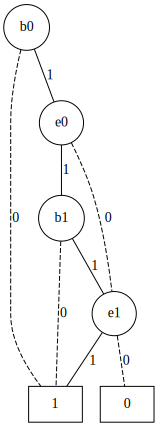

In [78]:
Source(f.to_dot())